In [1]:
import import_ipynb
import pandas as pd
import numpy as np
from pycaret.regression import *
from pycaret.utils import check_metric
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = pd.read_csv('C:\\Users\\ajens\\OneDrive\\Documents\\Personal\\A.Jensen MDS\\kc_house_data.csv')

In [3]:
dataset.shape

(21613, 21)

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Return the number of unique values for each variable and describe.
print(f'Return the number of unique values for each variable:\n{dataset.nunique(axis=0)}\n')
# remove variables and check if there are any missing values in any attributes
df = dataset.copy().drop(['id', 'date', 'long', 'lat', 'zipcode', 'yr_built', 'yr_renovated'], axis=1)
NA_val = df.isna().sum()
print(f'Return the number of missing values for each variable with dropped columns:\n{NA_val}')
print(f'New shape: {df.shape}')

Return the number of unique values for each variable:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

Return the number of missing values for each variable with dropped columns:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64
New shape: (21613, 14)


In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


<AxesSubplot:>

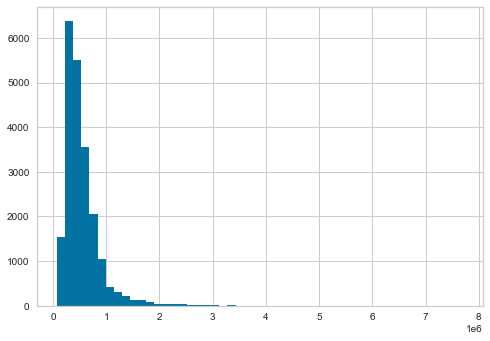

In [7]:
## Show distribution for Continuous variables
df['price'].hist(bins=50)

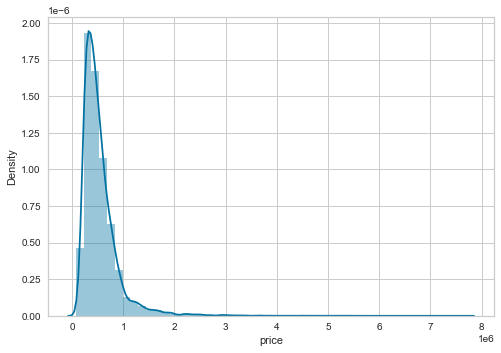

In [8]:
# Using Seaborn 
sns.distplot(df['price'])
plt.show()

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

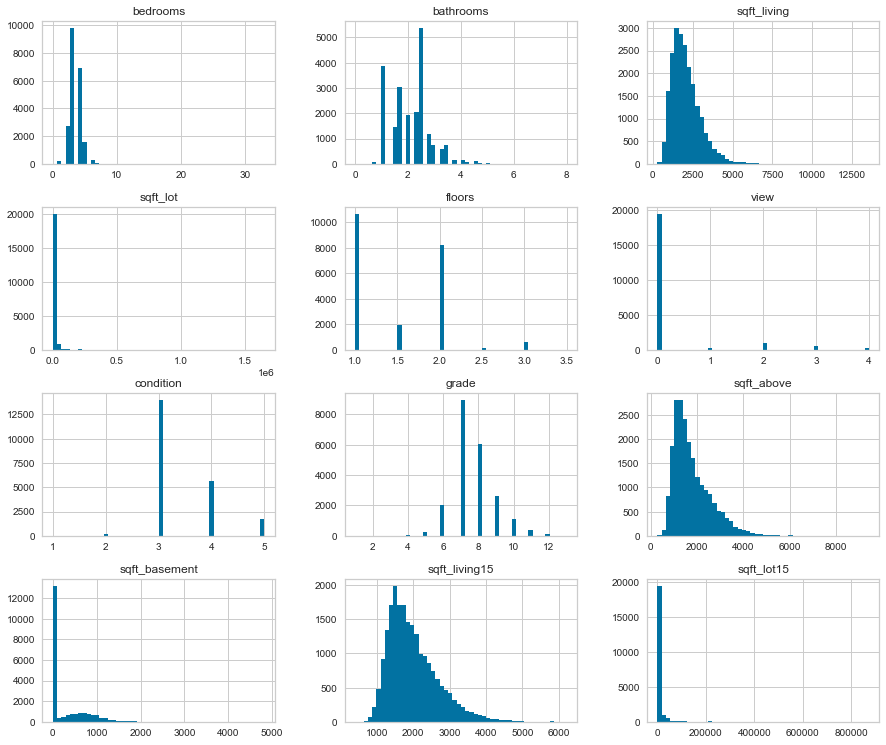

In [9]:
## Show distribution for remaining variables
df_dist= df.drop('price', axis= 1).drop('waterfront', axis=1)
df_dist.hist(figsize=(15,30),layout=(9,3), bins= 50)

In [10]:
# Catagorical Variables

def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3),)
    plt.bar(varValue.index, varValue, color=['c', 'm', 'b', 'g'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

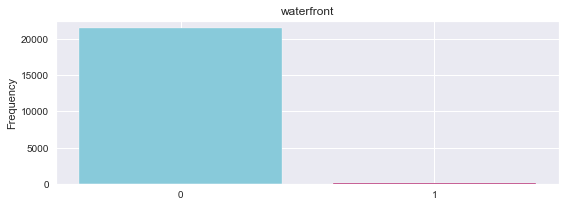

waterfront:
0    21450
1      163
Name: waterfront, dtype: int64


In [11]:
sns.set_style('darkgrid')
bar_plot('waterfront')

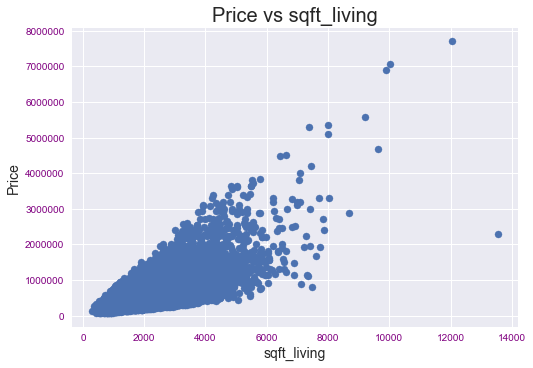

In [12]:
# Comparing two variables making units show without scientific notation
x= dataset['sqft_living']
y= dataset['price']

plt.style.use('seaborn')
fig, ax= plt.subplots()
ax.scatter(x, y, s= 50)

# set chart title and axis labels
ax.ticklabel_format(style='plain')
ax.set_title("Price vs sqft_living", fontsize= 20,)
ax.set_xlabel("sqft_living", fontsize= 14)
ax.set_ylabel("Price", fontsize= 14)
ax.tick_params(axis= 'both', labelsize= 10, labelcolor= 'purple')


plt.show()

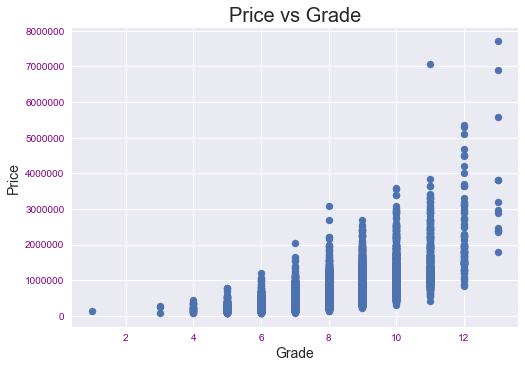

In [13]:
x= df['grade']
y= df['price']

plt.style.use('seaborn')
fig, ax= plt.subplots()
ax.scatter(x, y, s= 50)

# set chart title and axis labels
ax.ticklabel_format(style='plain')
ax.set_title("Price vs Grade", fontsize= 20,)
ax.set_xlabel("Grade", fontsize= 14)
ax.set_ylabel("Price", fontsize= 14)
ax.tick_params(axis= 'both', labelsize= 10, labelcolor= 'purple')


plt.show()

In [14]:
# find variables with highest correlations
corr_matrix = df.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
Name: price, dtype: float64


In [15]:
# In order to demonstrate the predict_model() function on unseen data, a sample of 600 has been withheld from 
# the original dataset to be used for predictions. Separate from the train/test split.
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (19452, 14)
Unseen Data For Predictions (2161, 14)


In [17]:
# passing customization parameters in setup (this would otherwise be defaulted). Preprocessing steps are taken place here.
exp_reg102 = setup(data= data, target = 'price', session_id=123,
                  normalize = True, transformation = True, numeric_features= ['bedrooms',
                  'view', 'grade','condition'], combine_rare_levels = True, 
                   rare_level_threshold = 0.05, remove_multicollinearity = True, 
                   multicollinearity_threshold = 0.95, bin_numeric_features = ['sqft_basement'],
                   feature_selection= True, log_experiment = True, experiment_name = 'y1')

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(19452, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13616, 23)"


2022/03/23 15:51:31 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [18]:
# option of how to compare models
top3 = compare_models(exclude = ['et'], n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,125407.6633,39049599717.7769,197118.0020,0.7149,0.2998,0.2563,0.2320
rf,Random Forest Regressor,125784.6131,40814394885.2466,201477.3367,0.7020,0.3011,0.2548,1.3900
gbr,Gradient Boosting Regressor,129994.1319,41693672240.0477,203746.8856,0.6963,0.3096,0.2671,0.4910
knn,K Neighbors Regressor,138595.7297,51633790156.8000,226669.8609,0.6256,0.3290,0.2709,0.1170
ridge,Ridge Regression,163887.6188,66631201177.6000,257139.9922,0.5191,0.4853,0.3507,0.0210
llar,Lasso Least Angle Regression,163839.4609,66633209673.9370,257143.7492,0.5191,0.4798,0.3506,0.0230
br,Bayesian Ridge,163898.6416,66634895510.6666,257145.6478,0.5191,0.4845,0.3507,0.0230
lar,Least Angle Regression,163883.0002,66635899087.1515,257150.5615,0.5190,0.4841,0.3507,0.0240
lasso,Lasso Regression,163882.4938,66635702272.0000,257150.1562,0.5190,0.4842,0.3507,0.0450
lr,Linear Regression,163882.9969,66635894784.0000,257150.5531,0.5190,0.4842,0.3507,0.9040


In [19]:
print(top3)

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.

In [20]:
# create a model with 10 fold cross validation
lightgbm = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,126372.8528,48224092529.2562,219599.8464,0.7090,0.2996,0.2563
1,125482.1191,37724841577.9393,194228.8382,0.7196,0.2980,0.2586
2,125418.4635,37907301966.2854,194697.9763,0.5995,0.3083,0.2607
3,122051.3305,31249217253.3123,176774.4813,0.7407,0.3023,0.2602
4,127963.9784,39200161731.4242,197990.3072,0.7104,0.2950,0.2460
5,123828.9005,36534087956.9979,191138.9232,0.7344,0.2973,0.2550
6,128051.5842,38367639150.1313,195876.5916,0.7540,0.2992,0.2557
7,128809.3249,50524731585.0056,224777.0709,0.7102,0.3015,0.2588
8,121266.7327,33703617826.9868,183585.4510,0.7527,0.3001,0.2565
9,124831.3469,37060305600.4302,192510.5337,0.7185,0.2966,0.2550


In [21]:
rf = create_model('rf', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,121907.7452,38709589401.2925,196747.5271,0.7664,0.2918,0.2473
1,127508.9869,47036028079.8492,216877.9105,0.6504,0.3021,0.2592
2,122809.4870,35570064604.5544,188600.2773,0.6242,0.3091,0.2586
3,123116.3093,35031944915.7694,187168.2262,0.7093,0.3061,0.2606
4,130573.9723,42579827619.8712,206348.8009,0.6855,0.3036,0.2507
5,125486.9675,39927304847.2821,199818.1795,0.7098,0.2952,0.2514
6,128315.5695,38399581479.8961,195958.1115,0.7538,0.3009,0.2548
7,132470.2686,56803036970.4881,238333.8771,0.6742,0.3095,0.2621
8,122206.4286,36453723836.8686,190928.5831,0.7325,0.2993,0.2543
9,123450.3959,37632847096.5941,193991.8738,0.7141,0.2936,0.2493


In [23]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,128906.3231,43952385633.7356,209648.2426,0.7348,0.3051,0.2636
1,131212.3168,41565412071.9791,203875.9723,0.6911,0.3059,0.2679
2,126758.6916,36209278565.9797,190287.3579,0.6175,0.3139,0.2673
3,127091.9244,36517989653.3491,191096.8070,0.6970,0.3114,0.2698
4,133653.8256,44139624301.9292,210094.3224,0.6739,0.3062,0.2547
5,128205.4199,39714289850.6574,199284.4446,0.7113,0.3026,0.2630
6,131592.1576,40215176658.5136,200537.2201,0.7422,0.3037,0.2617
7,135346.1970,59043933060.5868,242989.5740,0.6613,0.3116,0.2687
8,127663.0407,38424006423.0243,196020.4235,0.7180,0.3090,0.2669
9,127086.2108,39122227283.2715,197793.3954,0.7028,0.3007,0.2589


In [24]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,126264.9442,47806772381.6885,218647.5986,0.7115,0.3024,0.2548
1,128617.4876,36802204943.3196,191839.0079,0.7265,0.3084,0.2631
2,125751.1027,36182945570.6745,190218.1526,0.6177,0.3120,0.2630
3,125775.0905,35111684874.6120,187381.1220,0.7087,0.3122,0.2645
4,130178.1790,40386903987.4904,200964.9322,0.7017,0.3026,0.2491
5,123108.9746,37029615107.7195,192430.8060,0.7308,0.2956,0.2485
6,127727.0152,39346573380.5711,198359.7070,0.7477,0.3015,0.2532
7,131808.8952,57364209912.0516,239508.2669,0.6709,0.3065,0.2600
8,126898.7434,37001992298.2543,192359.0193,0.7284,0.3089,0.2608
9,129538.4438,39668055376.3842,199168.4096,0.6987,0.3043,0.2589


In [25]:
boosted_model = ensemble_model(lightgbm, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,124129.1335,47613865741.8827,218206.0167,0.7127,0.2973,0.2539
1,125981.6280,36876932120.9944,192033.6744,0.7259,0.2975,0.2589
2,123027.7932,35244667988.1752,187735.6332,0.6277,0.3042,0.2582
3,121464.9223,31349121368.5982,177056.8309,0.7399,0.3015,0.2602
4,127185.1803,38674874389.3585,196659.2850,0.7143,0.2943,0.2445
5,122610.3653,35640699042.1135,188787.4441,0.7409,0.2939,0.2527
6,126838.5870,37288145075.0662,193101.3855,0.7609,0.2959,0.2545
7,128020.8489,51337970313.2819,226578.8391,0.7055,0.3008,0.2586
8,121054.4657,34377455853.6075,185411.5850,0.7477,0.2995,0.2563
9,123642.1048,35057281576.3970,187235.8982,0.7337,0.2949,0.2540


In [26]:
# blend individual models
blender = blend_models(estimator_list = [lightgbm, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,121961.4946,41777942745.2414,204396.5331,0.7479,0.2912,0.2482
1,124573.2674,39958251554.5681,199895.6016,0.7030,0.2954,0.2557
2,122180.9460,35416066711.1657,188191.5692,0.6258,0.3045,0.2563
3,120198.4752,31555304429.6650,177638.1277,0.7382,0.2995,0.2566
4,127711.5085,39678714194.3809,199195.1661,0.7069,0.2954,0.2455
5,122359.5213,36925786821.3081,192160.8358,0.7316,0.2917,0.2492
6,126137.7924,37121581625.9554,192669.6178,0.7620,0.2953,0.2517
7,128415.4221,52008226735.4883,228053.1226,0.7017,0.3010,0.2570
8,119945.9979,33676678415.7909,183512.0661,0.7529,0.2955,0.2521
9,121506.2741,35100356239.1341,187350.8907,0.7334,0.2904,0.2488


In [27]:
#finalize model
final_model = finalize_model(boosted_model)

In [28]:
predict_model(final_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,108481.9839,24113615918.5079,155285.5947,0.8093,0.2818,0.2416


In [29]:
# prediction on unseen data
unseen_predictions = predict_model(boosted_model, data=data_unseen)
unseen_predictions.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Label
0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,4.609969e+05
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,4760,101930,1.441184e+06
2,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1780,12697,3.406910e+05
3,605000.0,4,2.50,2620,7553,2.0,0,0,3,8,2620,0,2620,11884,5.427836e+05
4,345000.0,5,2.50,3150,9134,1.0,0,0,4,8,1640,1510,1990,9133,5.612522e+05


In [30]:
check_metric(unseen_predictions.price, unseen_predictions.Label, 'R2')

0.7598

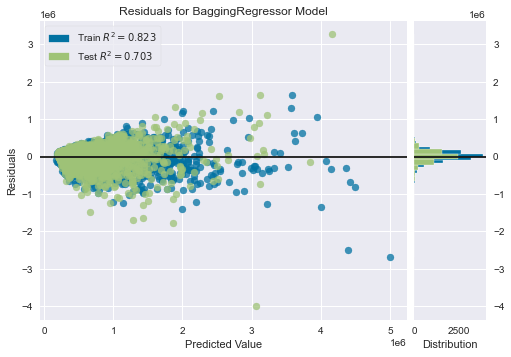

In [39]:
plot_model(boosted_model)

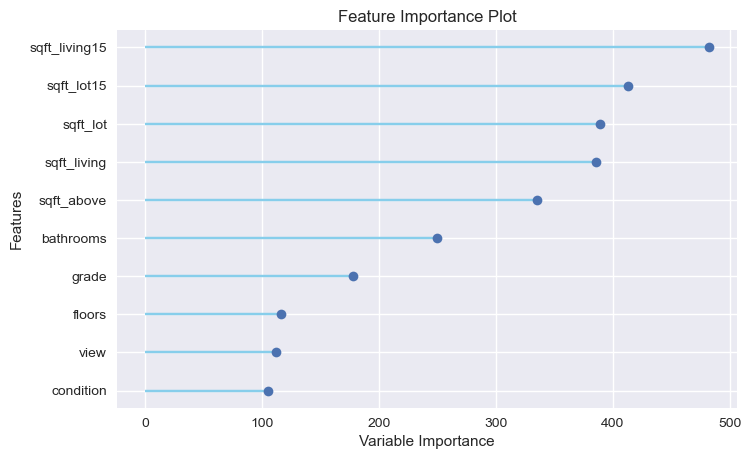

In [37]:
plot_model(lightgbm, plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

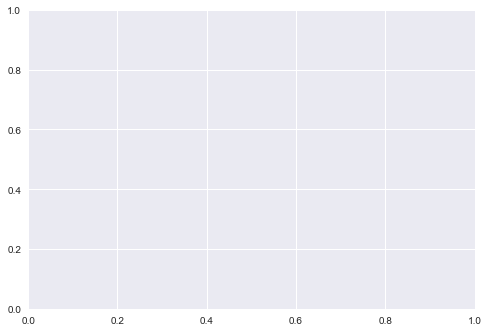

In [35]:
evaluate_model(final_model)